In [90]:
import pandas as pd
import plotly.express as px
import seaborn as sns

olympic_data = pd.read_csv("Data/athlete_events.csv")
olympic_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### a) - hur många länder som är med i datan?

In [91]:
countries = olympic_data['NOC'].unique()
print(f"There are {len(countries)} countries in the dataset")

There are 230 countries in the dataset


### b) - vilka länder är med? (förkortningarna räcker)

In [92]:
print(pd.Series(countries)) # Because a series looks fancier

0      CHN
1      DEN
2      NED
3      USA
4      FIN
      ... 
225    TUV
226    NFL
227    KOS
228    SSD
229    LES
Length: 230, dtype: object


### c) - vilka sporter är med?

In [93]:
sports = olympic_data["Sport"].value_counts()
print(f"There are {len(sports)} different sports in the dataset")

There are 66 different sports in the dataset


### d) - vilka medaljtyper finns det?

In [94]:
type_of_medals = olympic_data['Medal'].dropna().unique()
print(pd.Series(type_of_medals)) # Because a series looks fancier

0      Gold
1    Bronze
2    Silver
dtype: object


### e) - ta reda på statistik för åldern: medelvärde, median, min, max, standardavvikelse

In [95]:
olympic_data["Age"].describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

#### f) - utforska datan vidare med egna frågor
- Vilken stad har haft OS flest gånger?
- Statistik längd: medelvärde, medianm min, max, standardavvikelse?


In [96]:
# Statistik längd
stats_heights = olympic_data["Height"].describe()
stats_heights

count    210945.000000
mean        175.338970
std          10.518462
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: Height, dtype: float64

#### g) - diagram över könsfördelningen

<AxesSubplot: title={'center': 'Percentages of Female/Male Athletes'}>

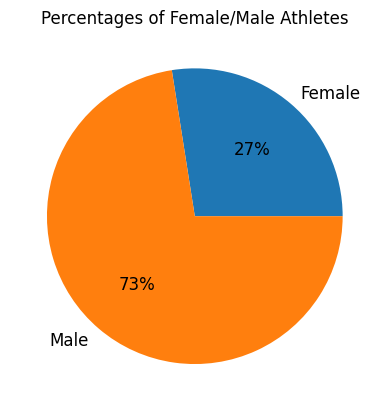

In [97]:
#------------Matplotlib-----------------
#https://stackoverflow.com/questions/63687789/how-do-i-create-a-pie-chart-using-categorical-data-in-matplotlib

# Group by sex, get size and plot
olympic_data.groupby('Sex').size().plot(
    kind='pie',
    labels=["Female", "Male"],
    autopct='%1.0f%%',
    title="Percentages of Female/Male Athletes",
    textprops={'fontsize': 12}
)

#### h) - diagram över topp 10 länder som tagit flest medaljer

[Text(0.5, 1.0, 'Top 10 total medals (NOC)'),
 Text(0.5, 0, 'Countries'),
 Text(0, 0.5, 'Total Medals')]

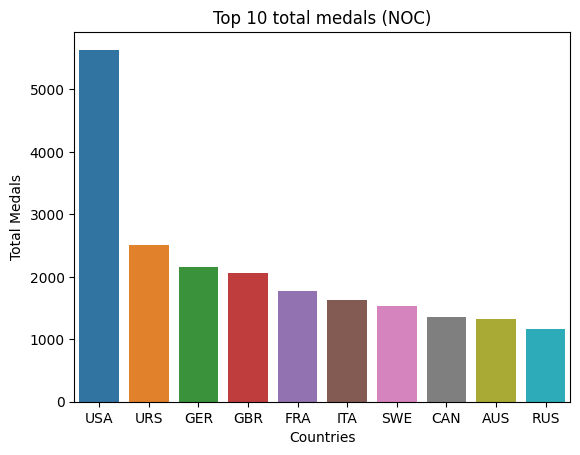

In [98]:
# Get 'NOC' column count, sort by medals and take the first (top) 10
values_noc_count = olympic_data.groupby('NOC').count()
medals = values_noc_count.sort_values("Medal", ascending=False)
medals_top10 = medals.head(10).reset_index()

fig = sns.barplot(
    data=medals_top10,
    x="NOC",
    y="Medal"
)

fig.set(
    title="Top 10 total medals (NOC)",
    xlabel="Countries",
    ylabel="Total Medals"
)

### i) - plotta gärna fler saker som är intressant

#### Medalj distribution mellan länderna

In [99]:
# Group by 'NOC' and count all medals
medals_across_countries = olympic_data.groupby("NOC")['Medal'].count()
medals_across_countries = medals_across_countries.sort_values(ascending=False)

medals_across_countries_top50 = medals_across_countries.iloc[:50]

fig = px.bar(
    x=medals_across_countries_top50.index,
    y=medals_across_countries_top50,
    title="Medalj distribution mellan länderna",
    
    labels={
        'x': '',
        'y': 'Medals'
    }
)

fig.show()

#### Den procentuella fördelningen mellan sommar och vinter säsonger av det olympiska spelen

In [100]:
num_of_olympic_years = olympic_data.drop_duplicates(subset=['Year'], keep='first')
olympic_seasons_distribution = num_of_olympic_years['Season'].value_counts()

fig = px.pie(
    values=olympic_seasons_distribution,
    names=olympic_seasons_distribution.index,
    title="Den procentuella fördelningen mellan sommar och vinter säsonger av det olympiska spelen"
)

fig.show()